# Creating training set

This notebooks generates series of 32x32x32 volumes of both image and mask data of vesicles to create a training set for machine learning. 

In [47]:
import os, re, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import skimage.io as io

from skimage.morphology import label as label
from skimage.measure import regionprops as regprop
from skimage.morphology import disk, binary_dilation

import mrcfile

In [43]:
# #define location of data
# server_path = '/Volumes/synaptosome/pyto/tomo/'
# server_path = '/mnt/data/amin/Data/tomo/'
# #define location where to save the training data 
# folder_to_save = '/Users/gw18g940/Desktop/Test_data/Zuber/multi_set_training/'
# folder_to_save = '/mnt/data/amin/Data/train_dataset_nonad/'

In [51]:
# server_path = '/mnt/data/amin/Handpicked/'
server_path = '/mnt/data/amin/Data/tomo/'
folder_to_save = '/mnt/data/Amin/Data/train_dataset_64_synaptasome_8000/'

In [52]:
#find all folders containing data
# folders = glob.glob(server_path+'*ctrl*')
folders = glob.glob(server_path+'*')

In [53]:
folders

['/mnt/data/amin/Data/tomo/spray_ctrl_2',
 '/mnt/data/amin/Data/tomo/spray_ctrl_3',
 '/mnt/data/amin/Data/tomo/spray_ctrl_5',
 '/mnt/data/amin/Data/tomo/spray_ctrl_9',
 '/mnt/data/amin/Data/tomo/spray_ctrl_6',
 '/mnt/data/amin/Data/tomo/spray_ctrl_1',
 '/mnt/data/amin/Data/tomo/spray_ctrl_8',
 '/mnt/data/amin/Data/tomo/spray_ctrl_4',
 '/mnt/data/amin/Data/tomo/find_bin0.bash',
 '/mnt/data/amin/Data/tomo/spray_ctrl_7']

/mnt/data/amin/Data/tomo/spray_ctrl_2
0
/mnt/data/amin/Data/tomo/spray_ctrl_2/3.nad.rec.nad


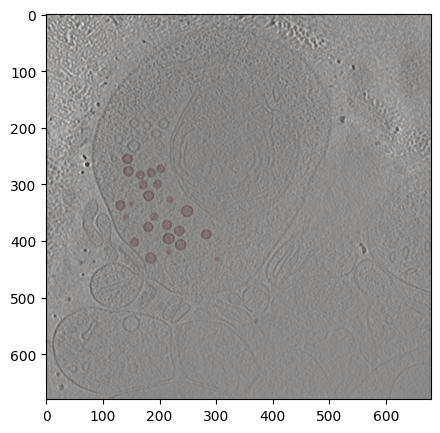

/tmp/ipykernel_1045919/448150266.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image[z:z+64, x:x+64,y:y+64].astype(np.float))
/tmp/ipykernel_1045919/448150266.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask[z:z+64, x:x+64,y:y+64].astype(np.float))


/mnt/data/amin/Data/tomo/spray_ctrl_3
14
/mnt/data/amin/Data/tomo/spray_ctrl_3/8.nad.rec.nad


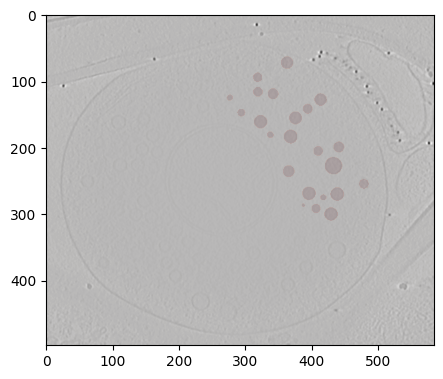

/mnt/data/amin/Data/tomo/spray_ctrl_5
39
/mnt/data/amin/Data/tomo/spray_ctrl_5/20150610_17.nad.rec.nad


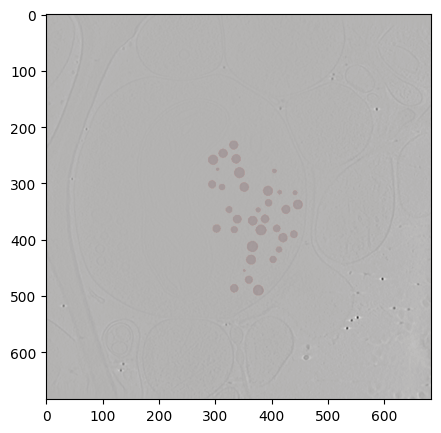

/mnt/data/amin/Data/tomo/spray_ctrl_9
63
/mnt/data/amin/Data/tomo/spray_ctrl_9/5-trim.nad.rec.nad


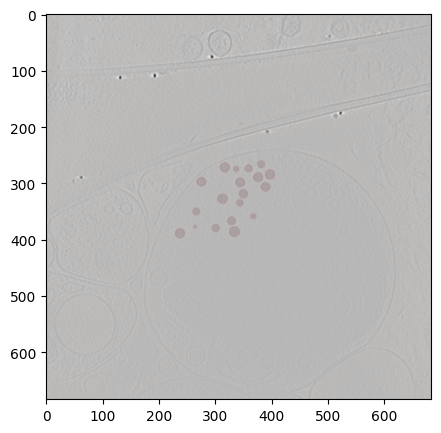

/mnt/data/amin/Data/tomo/spray_ctrl_6
81
/mnt/data/amin/Data/tomo/spray_ctrl_6/5.nad.rec.nad


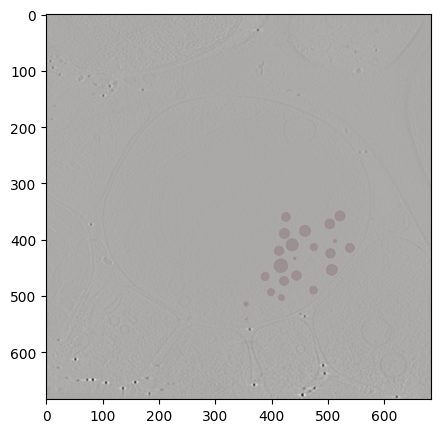

/mnt/data/amin/Data/tomo/spray_ctrl_1
98
/mnt/data/amin/Data/tomo/spray_ctrl_1/6-trim.nad.rec.nad


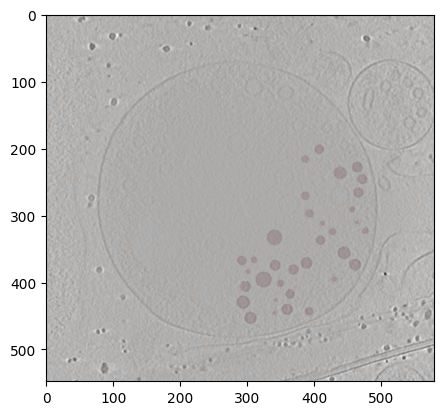

/mnt/data/amin/Data/tomo/spray_ctrl_8
130
/mnt/data/amin/Data/tomo/spray_ctrl_8/4-trim.nad.rec.nad


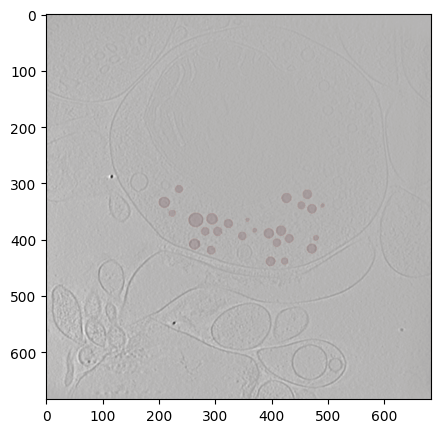

/mnt/data/amin/Data/tomo/spray_ctrl_4
144
/mnt/data/amin/Data/tomo/spray_ctrl_4/20150610_14.nad.rec.nad


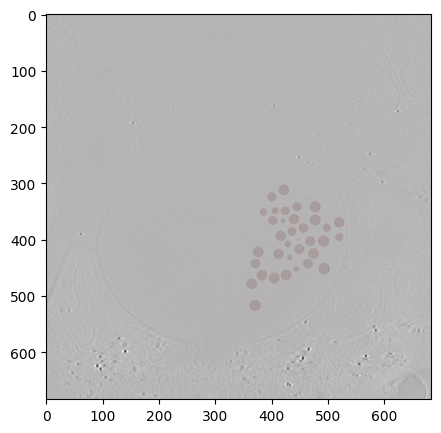

/mnt/data/amin/Data/tomo/find_bin0.bash
/mnt/data/amin/Data/tomo/spray_ctrl_7
163
/mnt/data/amin/Data/tomo/spray_ctrl_7/4-trim.nad.rec.nad


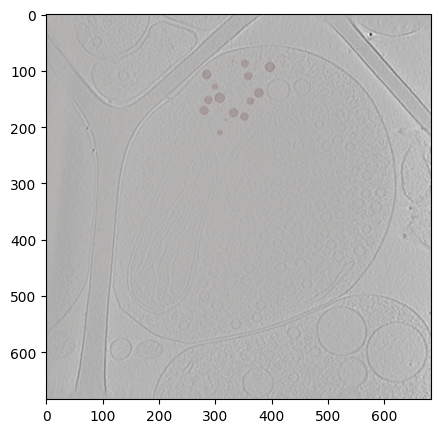

In [54]:
#in all folders, load both .rec and .mrc files. Use the cell contour to define a region to consider 
#for extraction of data (empty regions are not interesting)
ind =0
for f in folders:
    
    print(f)
    if os.path.exists(f+'/labels-16bit.mrc'):
        print(ind)
        print(glob.glob(f+'/*.rec.nad')[0])
        
        imagefile = mrcfile.open(glob.glob(f+'/*.rec.nad')[0])
        maskfile = mrcfile.open(f+'/labels-16bit.mrc')

        image = imagefile.data
        mask = maskfile.data
        
        mask = mask >= 10
        
        fig, ax = plt.subplots(figsize=(5,5))
        plt.imshow(image[100,:,:],cmap = 'gray')
        plt.imshow(mask[100,:,:], cmap = 'Reds', alpha = 0.1)
        plt.show()
        
        #dilate the cell mask 
        mask2d = binary_dilation(np.sum(mask,axis = 0)>0,disk(20))>0
        
        #split the volume into 32x32x32 volumes. Keep only volumes occupied 
        #by a sufficient amount of vesicles (1000 voxels)
        for z in np.arange(0,image.shape[0]-64,64):
            for x in np.arange(0,image.shape[1]-64,64):
                for y in np.arange(0,image.shape[2]-64,64):
                    if np.sum(mask[z:z+64,x:x+64,y:y+64])>8000:
                        np.save(folder_to_save+'image_'+str(ind)+'.npy',
                       image[z:z+64, x:x+64,y:y+64].astype(np.float))

                        np.save(folder_to_save+'mask_'+str(ind)+'.npy',
                       mask[z:z+64, x:x+64,y:y+64].astype(np.float))
                        ind+=1

/mnt/data/amin/Data/tomo/spray_ctrl_2
0
/mnt/data/amin/Data/tomo/spray_ctrl_2/3.nad.rec.nad


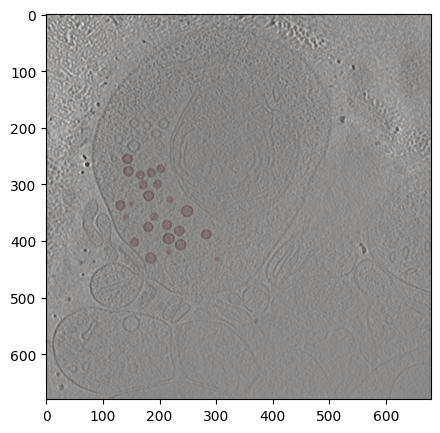

/tmp/ipykernel_1045919/1014204518.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image[z:z+32, x:x+32,y:y+32].astype(np.float))
/tmp/ipykernel_1045919/1014204518.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask[z:z+32, x:x+32,y:y+32].astype(np.float))


/mnt/data/amin/Data/tomo/spray_ctrl_3
74
/mnt/data/amin/Data/tomo/spray_ctrl_3/8.nad.rec.nad


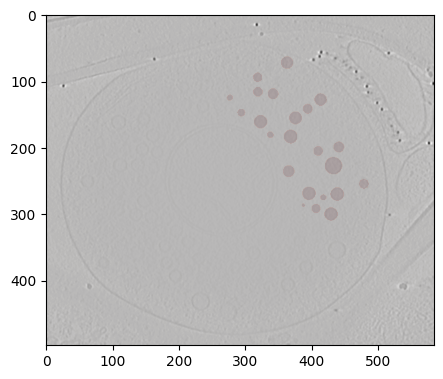

/mnt/data/amin/Data/tomo/spray_ctrl_5
197
/mnt/data/amin/Data/tomo/spray_ctrl_5/20150610_17.nad.rec.nad


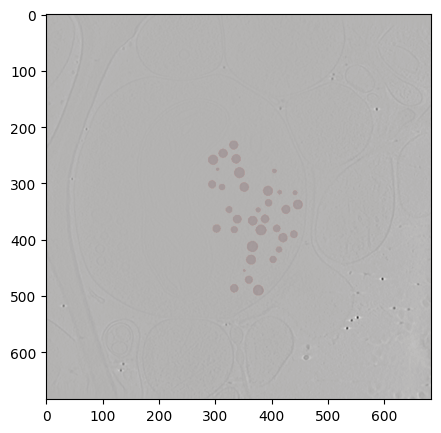

/mnt/data/amin/Data/tomo/spray_ctrl_9
341
/mnt/data/amin/Data/tomo/spray_ctrl_9/5-trim.nad.rec.nad


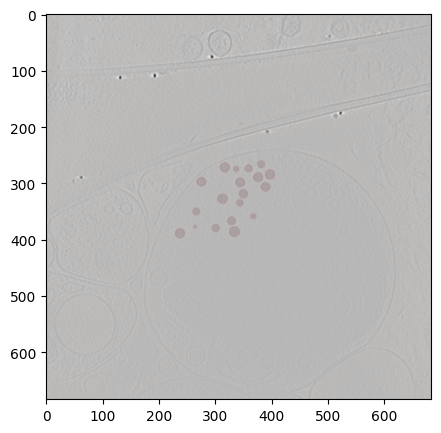

/mnt/data/amin/Data/tomo/spray_ctrl_6
452
/mnt/data/amin/Data/tomo/spray_ctrl_6/5.nad.rec.nad


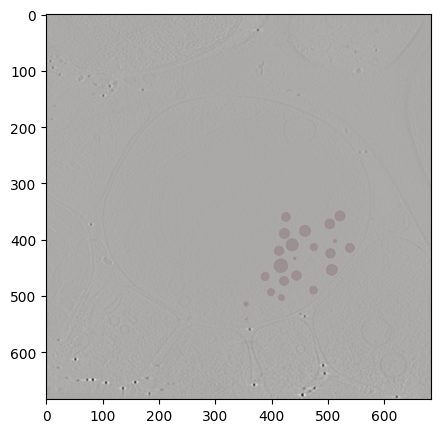

/mnt/data/amin/Data/tomo/spray_ctrl_1
561
/mnt/data/amin/Data/tomo/spray_ctrl_1/6-trim.nad.rec.nad


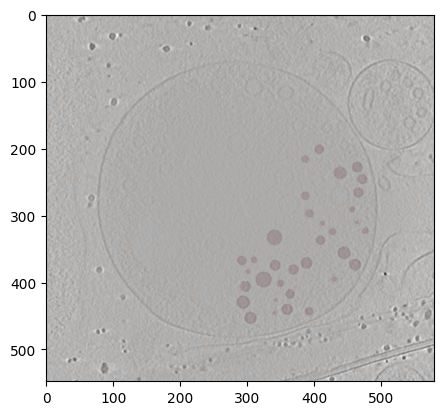

/mnt/data/amin/Data/tomo/spray_ctrl_8
748
/mnt/data/amin/Data/tomo/spray_ctrl_8/4-trim.nad.rec.nad


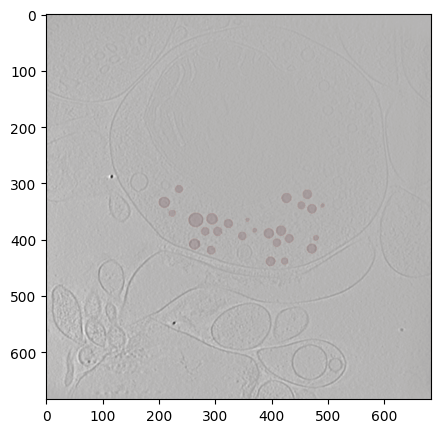

/mnt/data/amin/Data/tomo/spray_ctrl_4
870
/mnt/data/amin/Data/tomo/spray_ctrl_4/20150610_14.nad.rec.nad


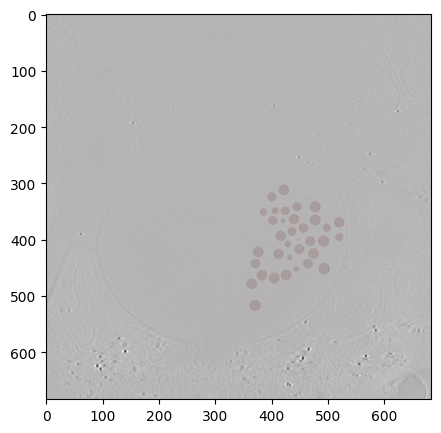

/mnt/data/amin/Data/tomo/spray_ctrl_7
970
/mnt/data/amin/Data/tomo/spray_ctrl_7/4-trim.nad.rec.nad


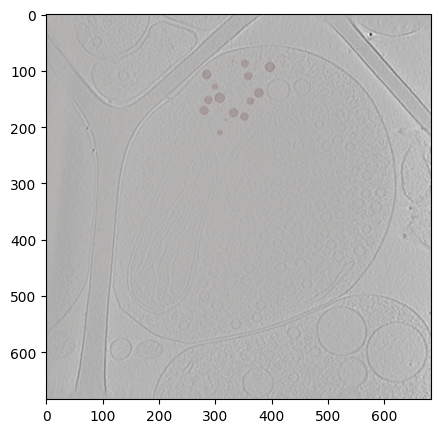

In [10]:
#in all folders, load both .rec and .mrc files. Use the cell contour to define a region to consider 
#for extraction of data (empty regions are not interesting)
ind =0
for f in folders:
    
    print(f)
    if os.path.exists(f+'/labels-16bit.mrc'):
        print(ind)
        print(glob.glob(f+'/*.rec.nad')[0])
        
        imagefile = mrcfile.open(glob.glob(f+'/*.rec.nad')[0])
        maskfile = mrcfile.open(f+'/labels-16bit.mrc')

        image = imagefile.data
        mask = maskfile.data
        
        mask = mask >= 10
        
        fig, ax = plt.subplots(figsize=(5,5))
        plt.imshow(image[100,:,:],cmap = 'gray')
        plt.imshow(mask[100,:,:], cmap = 'Reds', alpha = 0.1)
        plt.show()
        
        #dilate the cell mask 
        mask2d = binary_dilation(np.sum(mask,axis = 0)>0,disk(20))>0
        
        #split the volume into 32x32x32 volumes. Keep only volumes occupied 
        #by a sufficient amount of vesicles (1000 voxels)
        for z in np.arange(0,image.shape[0]-32,32):
            for x in np.arange(0,image.shape[1]-32,32):
                for y in np.arange(0,image.shape[2]-32,32):
                    if np.sum(mask[z:z+32,x:x+32,y:y+32])>1000:
                        np.save(folder_to_save+'image_'+str(ind)+'.npy',
                       image[z:z+32, x:x+32,y:y+32].astype(np.float))

                        np.save(folder_to_save+'mask_'+str(ind)+'.npy',
                       mask[z:z+32, x:x+32,y:y+32].astype(np.float))
                        ind+=1

In [52]:
index = 2

image = np.load(folder_to_save+'image_'+str(index)+'.npy')
mask = np.load(folder_to_save+'mask_'+str(index)+'.npy')
plt.imshow(image[25,:,:], cmap = 'gray')
plt.imshow(mask[25,:,:], cmap = 'Reds', alpha = 0.2)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Amin/Data/train_dataset/image_2.npy'

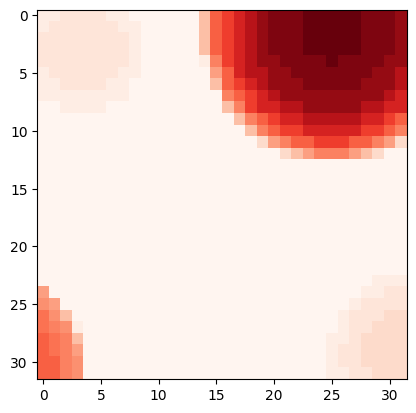

In [12]:
plt.imshow(np.sum(mask[:,:,:],axis = 0), cmap = 'Reds')
plt.show()


In [50]:
server_path = '/mnt/data/amin/Data/tomo/'
folder_to_save = '/mnt/data/Amin/Data/train_dataset/'
folders = glob.glob(server_path+'*')
print(folders)

['/mnt/data/amin/Data/tomo/spray_ctrl_2', '/mnt/data/amin/Data/tomo/spray_ctrl_3', '/mnt/data/amin/Data/tomo/spray_ctrl_5', '/mnt/data/amin/Data/tomo/spray_ctrl_9', '/mnt/data/amin/Data/tomo/spray_ctrl_6', '/mnt/data/amin/Data/tomo/spray_ctrl_1', '/mnt/data/amin/Data/tomo/spray_ctrl_8', '/mnt/data/amin/Data/tomo/spray_ctrl_4', '/mnt/data/amin/Data/tomo/spray_ctrl_7']


/mnt/data/amin/Data/tomo/spray_ctrl_2
0


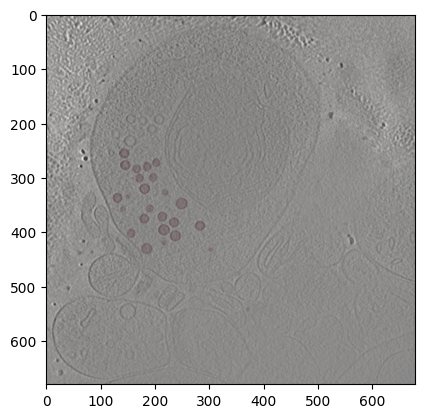

/mnt/data/amin/Data/tomo/spray_ctrl_3
14


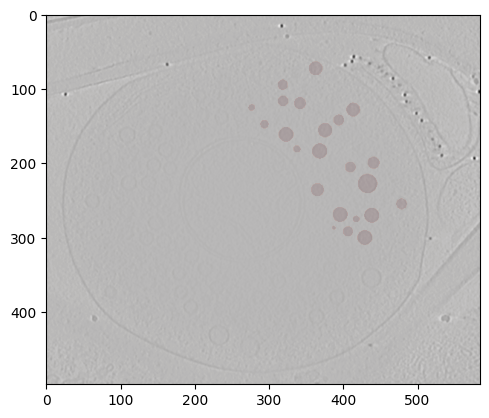

/mnt/data/amin/Data/tomo/spray_ctrl_5
39


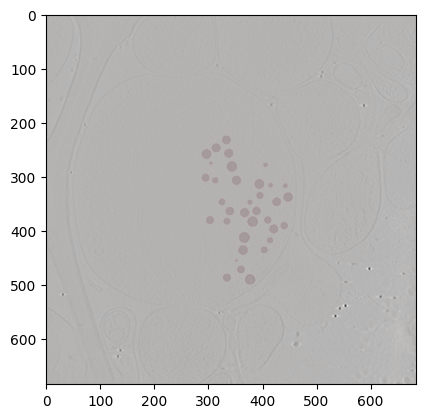

/mnt/data/amin/Data/tomo/spray_ctrl_9
63


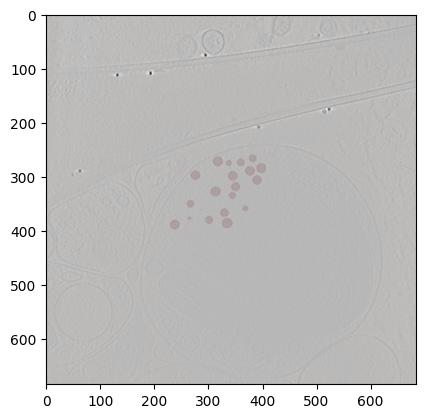

/mnt/data/amin/Data/tomo/spray_ctrl_6
81


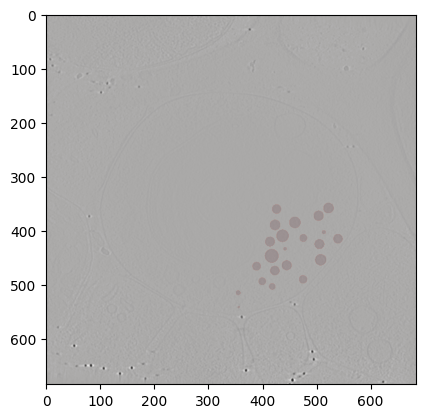

/mnt/data/amin/Data/tomo/spray_ctrl_1
98


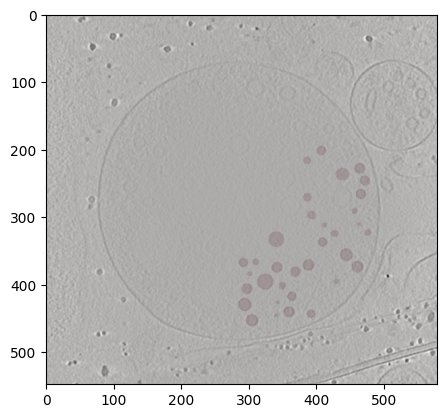

/mnt/data/amin/Data/tomo/spray_ctrl_8
130


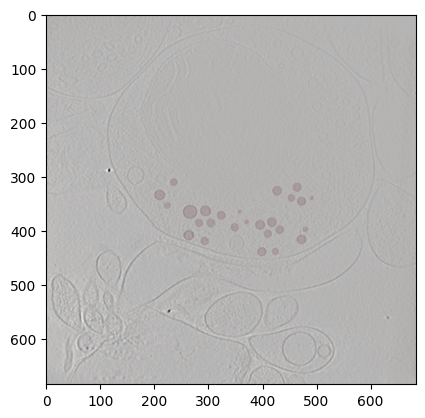

/mnt/data/amin/Data/tomo/spray_ctrl_4
144


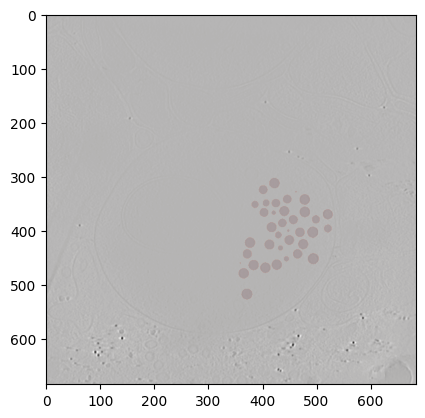

/mnt/data/amin/Data/tomo/spray_ctrl_7
163


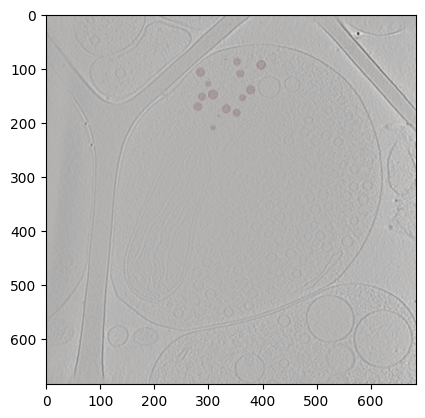

In [51]:
import os
import glob
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation
from skimage.morphology import disk
import nibabel as nib

# Adjust paths as necessary
base_dir = '/mnt/data/Amin/Data/train_dataset/'

train_img_dir = os.path.join(base_dir, 'imagesTr')
train_lbl_dir = os.path.join(base_dir, 'labelsTr')
val_img_dir = os.path.join(base_dir, 'imagesVal')
val_lbl_dir = os.path.join(base_dir, 'labelsVal')

# Create directories if they do not exist
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(train_lbl_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

ind = 0

for f in folders:
    print(f)
    if os.path.exists(f + '/labels-16bit.mrc'):
        print(ind)
        image_file_path = glob.glob(f + '/*.rec.nad')[0]
        mask_file_path = f + '/labels-16bit.mrc'

        with mrcfile.open(image_file_path) as imagefile, mrcfile.open(mask_file_path) as maskfile:
            image = imagefile.data
            mask = maskfile.data

        mask = mask >= 10

        # Processing and visualizing slices - optional for debugging
        plt.imshow(image[100,:,:], cmap='gray')
        plt.imshow(mask[100,:,:], cmap='Reds', alpha=0.1)
        plt.show()

        mask2d = binary_dilation(np.sum(mask, axis=0) > 0, disk(20)) > 0

        for z in range(0, image.shape[0] - 64, 64):
            for x in range(0, image.shape[1] - 64, 64):
                for y in range(0, image.shape[2] - 64, 64):
                    if np.sum(mask[z:z+64, x:x+64, y:y+64]) > 8000:
                        img_data = image[z:z+64, x:x+64, y:y+64].astype(np.float32)
                        mask_data = mask[z:z+64, x:x+64, y:y+64].astype(np.float32)

                        img_nii = nib.Nifti1Image(img_data, affine=np.eye(4))
                        mask_nii = nib.Nifti1Image(mask_data, affine=np.eye(4))

                        nib.save(img_nii, os.path.join(train_img_dir, f'image_{ind}.nii.gz'))
                        nib.save(mask_nii, os.path.join(train_lbl_dir, f'image_{ind}.nii.gz'))
                        ind += 1

In [75]:
# server_path = '/mnt/data/amin/Handpicked/'
server_path = '/mnt/data/amin/Data/tomo/'
folder_to_save = '/mnt/data/Amin/Data/train_dataset_2d_128_synaptasome_1000/'
folder_to_save = '/media/amin/mtwo/train_dataset_2d_128_synaptasome_1000/'

In [76]:
#find all folders containing data
# folders = glob.glob(server_path+'*ctrl*')
folders = glob.glob(server_path+'*')
folders

['/mnt/data/amin/Data/tomo/spray_ctrl_2',
 '/mnt/data/amin/Data/tomo/spray_ctrl_3',
 '/mnt/data/amin/Data/tomo/spray_ctrl_5',
 '/mnt/data/amin/Data/tomo/spray_ctrl_9',
 '/mnt/data/amin/Data/tomo/spray_ctrl_6',
 '/mnt/data/amin/Data/tomo/spray_ctrl_1',
 '/mnt/data/amin/Data/tomo/spray_ctrl_8',
 '/mnt/data/amin/Data/tomo/spray_ctrl_4',
 '/mnt/data/amin/Data/tomo/spray_ctrl_7']

In [77]:
#in all folders, load both .rec and .mrc files. Use the cell contour to define a region to consider 
#for extraction of data (empty regions are not interesting)
ind =0
num_validation_data = 2
for i, f in enumerate(folders):
    print(f)
    if os.path.exists(f+'/labels-16bit.mrc'):
        print(ind)
        print(glob.glob(f+'/*.rec.nad')[0])
        
        imagefile = mrcfile.open(glob.glob(f+'/*.rec.nad')[0])
        maskfile = mrcfile.open(f+'/labels-16bit.mrc')

        image = imagefile.data
        mask = maskfile.data
        
        mask = mask >= 10
        
        # fig, ax = plt.subplots(figsize=(5,5))
        # plt.imshow(image[100,:,:],cmap = 'gray')
        # plt.imshow(mask[100,:,:], cmap = 'Reds', alpha = 0.1)
        # plt.show()
        
        #dilate the cell mask 
        mask2d = binary_dilation(np.sum(mask,axis = 0)>0,disk(20))>0
        
        #split the volume into 32x32x32 volumes. Keep only volumes occupied 
        #by a sufficient amount of vesicles (1000 voxels)
        stride=128
        for z in np.arange(0,image.shape[0]):
            for x in np.arange(0,image.shape[1]-stride,stride):
                for y in np.arange(0,image.shape[2]-stride,stride):
                    if np.sum(mask[z,x:x+stride,y:y+stride])>1000:
                        np.save(folder_to_save+'image_'+str(ind)+'.npy',
                       image[z, x:x+stride,y:y+stride].astype(np.float))

                        np.save(folder_to_save+'mask_'+str(ind)+'.npy',
                       mask[z, x:x+stride,y:y+stride].astype(np.float))
                        ind+=1
        if i == (len(folders) - 1):
            print("Val Datasize: ", ind - train_dataset_size)
        if i > (len(folders) - num_validation_data - 1):
            continue
        for y in np.arange(0,image.shape[2]):
            for x in np.arange(0,image.shape[1]-stride,stride):
                for z in np.arange(0,image.shape[0]-stride,stride):
                    if np.sum(mask[z:z+stride,x:x+stride,y])>1000:
                        np.save(folder_to_save+'image_'+str(ind)+'.npy',
                       image[z:z+stride,x:x+stride,y].astype(np.float))

                        np.save(folder_to_save+'mask_'+str(ind)+'.npy',
                       mask[z:z+stride,x:x+stride,y].astype(np.float))
                        ind+=1
        for x in np.arange(0,image.shape[1]):
            for z in np.arange(0,image.shape[0]-stride,stride):
                for y in np.arange(0,image.shape[2]-stride,stride):
                    if np.sum(mask[z:z+stride,x,y:y+stride])>1000:
                        np.save(folder_to_save+'image_'+str(ind)+'.npy',
                       image[z:z+stride,x,y:y+stride].astype(np.float))

                        np.save(folder_to_save+'mask_'+str(ind)+'.npy',
                       mask[z:z+stride,x,y:y+stride].astype(np.float))
                        ind+=1
        if i == (len(folders) - num_validation_data - 1):
            print("Train Datasize: ",ind)
            train_dataset_size = ind

/mnt/data/amin/Data/tomo/spray_ctrl_2
0
/mnt/data/amin/Data/tomo/spray_ctrl_2/3.nad.rec.nad


/tmp/ipykernel_1045919/2425528974.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image[z, x:x+stride,y:y+stride].astype(np.float))
/tmp/ipykernel_1045919/2425528974.py:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask[z, x:x+stride,y:y+stride].astype(np.float))
/tmp/ipykernel_1045919/2425528974.py:49: DeprecationWarning: `np.fl

/mnt/data/amin/Data/tomo/spray_ctrl_3
455
/mnt/data/amin/Data/tomo/spray_ctrl_3/8.nad.rec.nad
/mnt/data/amin/Data/tomo/spray_ctrl_5
1003
/mnt/data/amin/Data/tomo/spray_ctrl_5/20150610_17.nad.rec.nad
/mnt/data/amin/Data/tomo/spray_ctrl_9
1791
/mnt/data/amin/Data/tomo/spray_ctrl_9/5-trim.nad.rec.nad
/mnt/data/amin/Data/tomo/spray_ctrl_6
2272
/mnt/data/amin/Data/tomo/spray_ctrl_6/5.nad.rec.nad
/mnt/data/amin/Data/tomo/spray_ctrl_1
2564
/mnt/data/amin/Data/tomo/spray_ctrl_1/6-trim.nad.rec.nad
/mnt/data/amin/Data/tomo/spray_ctrl_8
3583
/mnt/data/amin/Data/tomo/spray_ctrl_8/4-trim.nad.rec.nad
Train Datasize:  4062
/mnt/data/amin/Data/tomo/spray_ctrl_4
4062
/mnt/data/amin/Data/tomo/spray_ctrl_4/20150610_14.nad.rec.nad
/mnt/data/amin/Data/tomo/spray_ctrl_7
4270
/mnt/data/amin/Data/tomo/spray_ctrl_7/4-trim.nad.rec.nad
Val Datasize:  475
